In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=RuntimeWarning, module='sklearn.linear_model._base')
warnings.filterwarnings("ignore", category=RuntimeWarning, module='sklearn.utils.extmath')
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')


In [20]:
# Read the data
x_train = pd.read_pickle('data/X_train_final.pkl')
x_test = pd.read_pickle('data/X_test_final.pkl')
y_train_motor = pd.read_pickle('data/y_train_motor.pkl')
y_train_total = pd.read_pickle('data/y_train_total.pkl')
y_test_motor = pd.read_pickle('data/y_test_motor.pkl')
y_test_total = pd.read_pickle('data/y_test_total.pkl')
y_train_common = pd.read_pickle('data/y_train_common.pkl')
y_test_common = pd.read_pickle('data/y_test_common.pkl')

In [21]:
x_test.columns

Index(['Jitter:PPQ5', 'NHR', 'test_time_x_RPDE', 'test_time_x_Jitter(%)',
       'Jitter:RAP', 'NHR^2', 'Shimmer(dB)', 'Jitter(%)^2', 'Shimmer:APQ5',
       'jitter_mean', 'voice_instability', 'NHR_x_HNR',
       'Jitter:RAP_x_Shimmer:APQ3', 'jitter_std_x_shimmer_std',
       'nonlinear_std', 'PPE', 'RPDE', 'Shimmer:APQ11', 'DFA_x_age', 'sex',
       'shimmer_mean', 'noise_mean', 'noise_std', 'Jitter(%)_x_Shimmer', 'age',
       'jitter_std', 'DFA', 'noise_mean_x_nonlinear_std', 'Jitter(%)',
       'Jitter(Abs)', 'test_time', 'Shimmer^2', 'voice_instability_x_age',
       'Shimmer:APQ3', 'nonlinear_mean', 'RPDE_x_PPE', 'HNR', 'age_x_sex'],
      dtype='object')

In [22]:
x_test

,Jitter:PPQ5,NHR,test_time_x_RPDE,test_time_x_Jitter(%),Jitter:RAP,NHR^2,Shimmer(dB),Jitter(%)^2,Shimmer:APQ5,jitter_mean,...,Jitter(%),Jitter(Abs),test_time,Shimmer^2,voice_instability_x_age,Shimmer:APQ3,nonlinear_mean,RPDE_x_PPE,HNR,age_x_sex
731,0.822508,0.936385,0.021904,0.063384,0.907461,0.992492,0.708228,0.901777,0.680052,0.881528,...,0.840128,0.795847,0.022524,0.689852,0.176218,0.759737,0.623204,0.679135,0.293700,0.0
732,0.474534,0.553039,0.051452,0.072691,0.467383,0.667519,0.655072,0.394451,0.656367,0.489525,...,0.519666,0.522954,0.055064,0.568582,0.169381,0.665126,0.552851,0.569768,0.402956,0.0
733,0.685284,0.867666,0.082139,0.183515,0.790815,0.958330,0.713750,0.767625,0.728368,0.769195,...,0.749906,0.712876,0.087619,0.702808,0.182172,0.716075,0.562470,0.728231,0.355139,0.0
735,0.604237,0.588348,0.110813,0.241811,0.619751,0.706182,0.700680,0.588180,0.687734,0.629692,...,0.643580,0.627885,0.152738,0.638529,0.180993,0.695307,0.478447,0.542547,0.410941,0.0
736,0.715803,0.636318,0.137903,0.362760,0.775378,0.756578,0.689944,0.799316,0.628399,0.769819,...,0.769458,0.725347,0.185293,0.561701,0.189054,0.639492,0.479503,0.544538,0.463519,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,0.369739,0.571768,0.633414,0.559370,0.427518,0.688195,0.382598,0.329341,0.389539,0.436511,...,0.471769,0.480712,0.661847,0.192483,0.133448,0.387025,0.484964,0.591477,0.514436,0.0
5859,0.318776,0.329589,0.544530,0.466147,0.299472,0.388451,0.489251,0.185902,0.433814,0.319452,...,0.343120,0.398109,0.694639,0.274941,0.141089,0.415407,0.326908,0.330356,0.530626,0.0
5860,0.412607,0.449262,0.517900,0.538584,0.390064,0.545716,0.537031,0.252215,0.484327,0.403042,...,0.407758,0.398247,0.727105,0.313102,0.161373,0.517080,0.311234,0.336125,0.598860,0.0
5861,0.328786,0.232749,0.643460,0.477550,0.325354,0.248663,0.316400,0.166635,0.299358,0.327995,...,0.321937,0.335369,0.759246,0.120821,0.135119,0.274652,0.373593,0.392869,0.578725,0.0


In [23]:
males = x_test[x_test['sex'] == 0]
females = x_test[x_test['sex'] == 1]

## Linear Regression

In [24]:
model_motor = LinearRegression()
model_motor.fit(x_train, y_train_motor)

model_total = LinearRegression()
model_total.fit(x_train, y_train_total)

y_pred_motor = model_motor.predict(x_test)
y_pred_total = model_total.predict(x_test)

mse_motor = mean_squared_error(y_test_motor, y_pred_motor)
mse_total = mean_squared_error(y_test_total, y_pred_total)
print(f"Mean Squared Error (Motor): {mse_motor}")
print(f"Mean Squared Error (Total): {mse_total}")
print(f"R2 Score (Motor): {r2_score(y_test_motor, y_pred_motor)}")
print(f"R2 Score (Total): {r2_score(y_test_total, y_pred_total)}")

Mean Squared Error (Motor): 52.74796823504689
Mean Squared Error (Total): 96.02804059707604
R2 Score (Motor): -0.6413653470568115
R2 Score (Total): -0.6469438186567784


### Check the SHAP for each gender

Motor Model SHAP Summary Plot


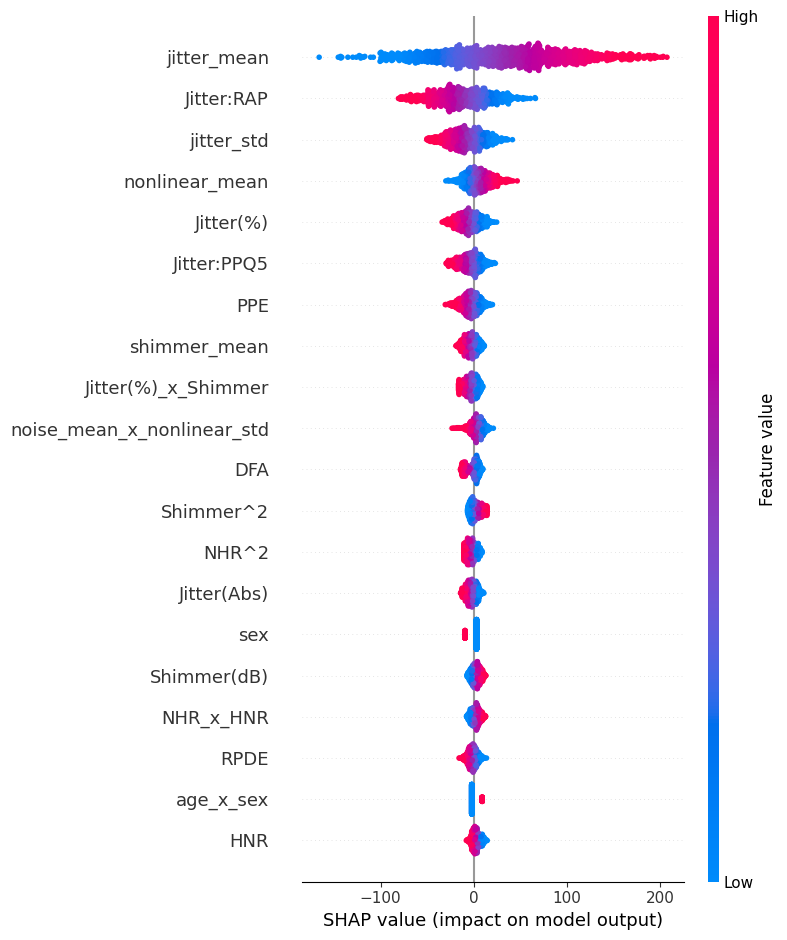

In [25]:
explainer_motor = shap.Explainer(model_motor, x_train)
shap_values_motor = explainer_motor(x_test)
shap_values_male = explainer_motor.shap_values(males)
shap_values_female = explainer_motor.shap_values(females)
print('Motor Model SHAP Summary Plot')
shap.summary_plot(shap_values_motor, show=False)

Motor Model SHAP Summary Plot for males


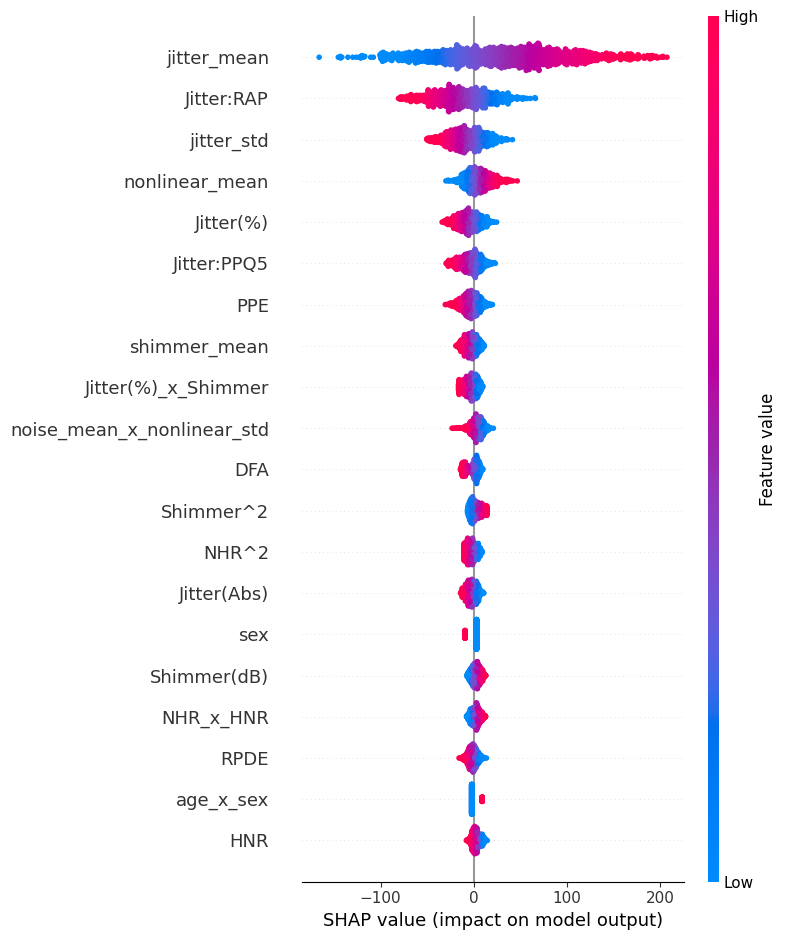

In [26]:
print('Motor Model SHAP Summary Plot for males')
shap.summary_plot(shap_values_motor, show=False)

Motor Model SHAP Summary Plot for females


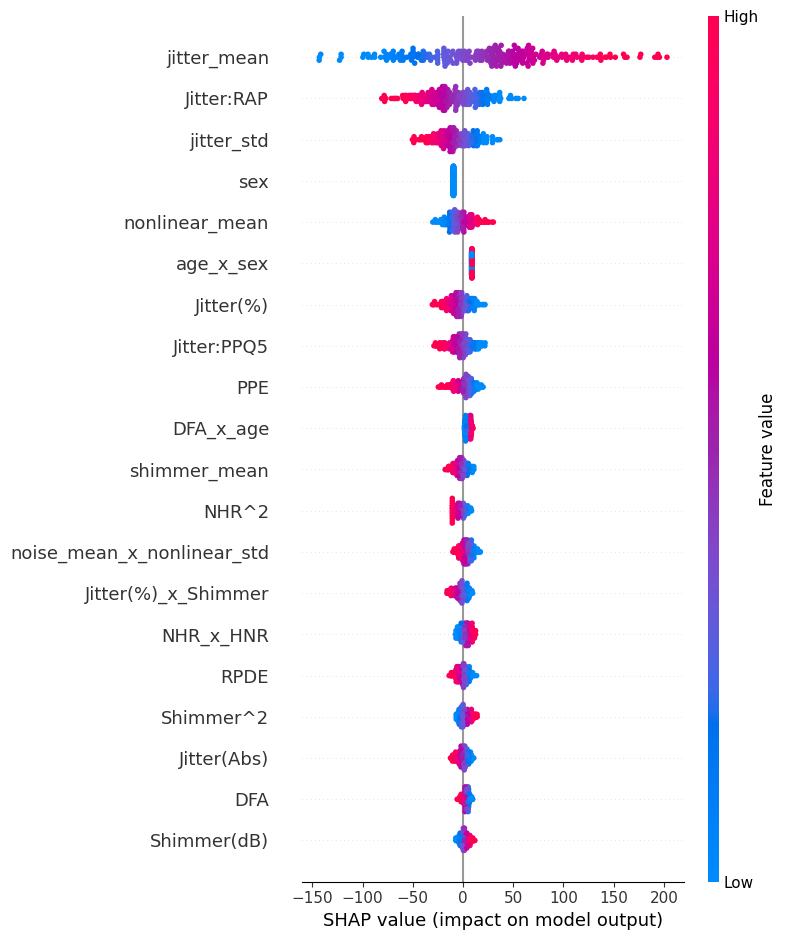

In [27]:
print('Motor Model SHAP Summary Plot for females')
shap.summary_plot(shap_values_female, females, show=False)

In [28]:
# Train the model only on males
males_train = x_train[x_train['sex'] == 0]
males_train_target = y_train_motor[x_train['sex'] == 0]

males_test = x_test[x_test['sex'] == 0]
males_test_target = y_test_motor[x_test['sex'] == 0]

model_motor_male = LinearRegression()
model_motor_male.fit(males_train, males_train_target)
y_pred_motor = model_motor_male.predict(males_test)
mse_motor = mean_squared_error(males_test_target, y_pred_motor)
print(f"Mean Squared Error (Motor, Males): {mse_motor}")
print(f"R2 Score (Motor, Males): {r2_score(males_test_target, y_pred_motor)}")


Mean Squared Error (Motor, Males): 53.24606796900908
R2 Score (Motor, Males): -0.4271585250976193


In [29]:
# Define females_train and females_train_target
females_train = x_train[x_train['sex'] == 1]
females_train_target = y_train_motor[x_train['sex'] == 1]

# Define females_test and females_test_target
females_test = x_test[x_test['sex'] == 1]
females_test_target = y_test_motor[x_test['sex'] == 1]

# Train and evaluate the model
model_motor_female = LinearRegression()
model_motor_female.fit(females_train, females_train_target)
y_pred_motor = model_motor_female.predict(females_test)
mse_motor = mean_squared_error(females_test_target, y_pred_motor)
print(f"Mean Squared Error (Motor, Females): {mse_motor}")
print(f"R2 Score (Motor, Females): {r2_score(females_test_target, y_pred_motor)}")

Mean Squared Error (Motor, Females): 134.38051853577753
R2 Score (Motor, Females): -14.60050598601217


## Ridge Regression

In [30]:
ridge_motor = Ridge()
ridge_total = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search_ridge_motor = GridSearchCV(ridge_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge_total = GridSearchCV(ridge_total, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge_motor.fit(x_train, y_train_motor)
grid_search_ridge_total.fit(x_train, y_train_total)
best_ridge_motor = grid_search_ridge_motor.best_estimator_
best_ridge_total = grid_search_ridge_total.best_estimator_
print(f"Best Ridge Motor Alpha: {best_ridge_motor.alpha}")
print(f"Best Ridge Total Alpha: {best_ridge_total.alpha}")

ridge_motor = Ridge(alpha=best_ridge_motor.alpha)
ridge_total = Ridge(alpha=best_ridge_total.alpha)

ridge_motor.fit(x_train, y_train_motor)
ridge_total.fit(x_train, y_train_total)

y_pred_motor_ridge = ridge_motor.predict(x_test)
y_pred_total_ridge = ridge_total.predict(x_test)
mse_motor_ridge = mean_squared_error(y_test_motor, y_pred_motor_ridge)
mse_total_ridge = mean_squared_error(y_test_total, y_pred_total_ridge)
print(f"Mean Squared Error (Motor Ridge): {mse_motor_ridge}")
print(f"Mean Squared Error (Total Ridge): {mse_total_ridge}")
print(f"R2 Score (Motor Ridge): {r2_score(y_test_motor, y_pred_motor_ridge)}")
print(f"R2 Score (Total Ridge): {r2_score(y_test_total, y_pred_total_ridge)}")

Best Ridge Motor Alpha: 100
Best Ridge Total Alpha: 100
Mean Squared Error (Motor Ridge): 49.960924017181725
Mean Squared Error (Total Ridge): 89.08852066711303
R2 Score (Motor Ridge): -0.5546405318082972
R2 Score (Total Ridge): -0.527926504734348


In [31]:
# Check what features ridge selected
ridge_motor_coef = pd.Series(ridge_motor.coef_, index=x_train.columns)
ridge_motor_coef = ridge_motor_coef[ridge_motor_coef != 0]
ridge_motor_coef = ridge_motor_coef.sort_values(ascending=False)
print("Ridge Motor Coefficients:")
print(ridge_motor_coef)

Ridge Motor Coefficients:
age                           3.638439
DFA_x_age                     3.034120
age_x_sex                     1.486752
RPDE                          1.345666
test_time                     1.288446
test_time_x_Jitter(%)         1.201314
Shimmer:APQ11                 1.191420
voice_instability_x_age       1.017946
test_time_x_RPDE              0.910137
RPDE_x_PPE                    0.863591
Jitter:PPQ5                   0.586632
PPE                           0.567067
Shimmer^2                     0.397760
jitter_mean                   0.373561
Jitter:RAP                    0.373319
jitter_std                    0.360052
NHR^2                         0.258879
Jitter(%)                     0.252159
NHR                           0.134505
nonlinear_mean                0.062189
Shimmer(dB)                   0.055147
jitter_std_x_shimmer_std     -0.016425
shimmer_mean                 -0.151961
NHR_x_HNR                    -0.153442
Jitter(%)^2                  -0.317246

## Lasso Regression

In [32]:
lasso_motor = Lasso()
lasso_total = Lasso()

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search_lasso_motor = GridSearchCV(lasso_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso_total = GridSearchCV(lasso_total, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_lasso_motor.fit(x_train, y_train_motor)
grid_search_lasso_total.fit(x_train, y_train_total)
best_lasso_motor = grid_search_lasso_motor.best_estimator_
best_lasso_total = grid_search_lasso_total.best_estimator_
print(f"Best Lasso Motor Alpha: {best_lasso_motor.alpha}")
print(f"Best Lasso Total Alpha: {best_lasso_total.alpha}")

lasso_motor = Lasso(alpha=best_lasso_motor.alpha)
lasso_total = Lasso(alpha=best_lasso_total.alpha)

lasso_motor.fit(x_train, y_train_motor)
lasso_total.fit(x_train, y_train_total)

y_pred_motor_lasso = lasso_motor.predict(x_test)
y_pred_total_lasso = lasso_total.predict(x_test)
mse_motor_lasso = mean_squared_error(y_test_motor, y_pred_motor_lasso)
mse_total_lasso = mean_squared_error(y_test_total, y_pred_total_lasso)
print(f"Mean Squared Error (Motor Lasso): {mse_motor_lasso}")
print(f"Mean Squared Error (Total Lasso): {mse_total_lasso}")
print(f"R2 Score (Motor Lasso): {r2_score(y_test_motor, y_pred_motor_lasso)}")
print(f"R2 Score (Total Lasso): {r2_score(y_test_total, y_pred_total_lasso)}")

Best Lasso Motor Alpha: 0.1
Best Lasso Total Alpha: 0.1
Mean Squared Error (Motor Lasso): 48.735582382947925
Mean Squared Error (Total Lasso): 92.07230329160528
R2 Score (Motor Lasso): -0.5165114177583459
R2 Score (Total Lasso): -0.5791003318693009


## Support Vector Machine (SVM)

In [33]:
svm_motor = SVR()
svm_total = SVR()

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svm_motor = GridSearchCV(svm_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svm_total = GridSearchCV(svm_total, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svm_motor.fit(x_train, y_train_motor)
grid_search_svm_total.fit(x_train, y_train_total)
best_svm_motor = grid_search_svm_motor.best_estimator_
best_svm_total = grid_search_svm_total.best_estimator_
print(f"Best SVM Motor C: {best_svm_motor.C}, Epsilon: {best_svm_motor.epsilon}, Kernel: {best_svm_motor.kernel}")
print(f"Best SVM Total C: {best_svm_total.C}, Epsilon: {best_svm_total.epsilon}, Kernel: {best_svm_total.kernel}")

svm_motor = SVR(C=best_svm_motor.C, epsilon=best_svm_motor.epsilon, kernel=best_svm_motor.kernel)
svm_total = SVR(C=best_svm_total.C, epsilon=best_svm_total.epsilon, kernel=best_svm_total.kernel)

svm_motor.fit(x_train, y_train_motor)
svm_total.fit(x_train, y_train_total)

y_pred_motor_svm = svm_motor.predict(x_test)
y_pred_total_svm = svm_total.predict(x_test)
mse_motor_svm = mean_squared_error(y_test_motor, y_pred_motor_svm)
mse_total_svm = mean_squared_error(y_test_total, y_pred_total_svm)
print(f"Mean Squared Error (Motor SVM): {mse_motor_svm}")
print(f"Mean Squared Error (Total SVM): {mse_total_svm}")
print(f"R2 Score (Motor SVM): {r2_score(y_test_motor, y_pred_motor_svm)}")
print(f"R2 Score (Total SVM): {r2_score(y_test_total, y_pred_total_svm)}")

Best SVM Motor C: 0.1, Epsilon: 0.1, Kernel: rbf
Best SVM Total C: 0.1, Epsilon: 0.01, Kernel: linear
Mean Squared Error (Motor SVM): 45.85662905926483
Mean Squared Error (Total SVM): 79.61608746885854
R2 Score (Motor SVM): -0.4269266549816859
R2 Score (Total SVM): -0.36546806856815683


## Random Forest Regression

In [34]:
rf_motor = RandomForestRegressor()
rf_total = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
    }
grid_search_rf_motor = RandomizedSearchCV(rf_motor, param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=10)
grid_search_rf_total = RandomizedSearchCV(rf_total, param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=10)
grid_search_rf_motor.fit(x_train, y_train_motor)
grid_search_rf_total.fit(x_train, y_train_total)
best_rf_motor = grid_search_rf_motor.best_estimator_
best_rf_total = grid_search_rf_total.best_estimator_
print(f"Best RF Motor N_Estimators: {best_rf_motor.n_estimators}, Max_Depth: {best_rf_motor.max_depth}, Min_Samples_Split: {best_rf_motor.min_samples_split}, Min_Samples_Leaf: {best_rf_motor.min_samples_leaf}")
print(f"Best RF Total N_Estimators: {best_rf_total.n_estimators}, Max_Depth: {best_rf_total.max_depth}, Min_Samples_Split: {best_rf_total.min_samples_split}, Min_Samples_Leaf: {best_rf_total.min_samples_leaf}")

rf_motor = RandomForestRegressor(n_estimators=best_rf_motor.n_estimators, max_depth=best_rf_motor.max_depth, min_samples_split=best_rf_motor.min_samples_split, min_samples_leaf=best_rf_motor.min_samples_leaf)
rf_total = RandomForestRegressor(n_estimators=best_rf_total.n_estimators, max_depth=best_rf_total.max_depth, min_samples_split=best_rf_total.min_samples_split, min_samples_leaf=best_rf_total.min_samples_leaf)

rf_motor.fit(x_train, y_train_motor)
rf_total.fit(x_train, y_train_total)

y_pred_motor_rf = rf_motor.predict(x_test)
y_pred_total_rf = rf_total.predict(x_test)
mse_motor_rf = mean_squared_error(y_test_motor, y_pred_motor_rf)
mse_total_rf = mean_squared_error(y_test_total, y_pred_total_rf)
print(f"Mean Squared Error (Motor RF): {mse_motor_rf}")
print(f"Mean Squared Error (Total RF): {mse_total_rf}")
print(f"R2 Score (Motor RF): {r2_score(y_test_motor, y_pred_motor_rf)}")
print(f"R2 Score (Total RF): {r2_score(y_test_total, y_pred_total_rf)}")

/Users/nicolajhoncharov/Documents/key_areas_2_faraci/assignment_1/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/nicolajhoncharov/Documents/key_areas_2_faraci/assignment_1/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best RF Motor N_Estimators: 100, Max_Depth: 10, Min_Samples_Split: 2, Min_Samples_Leaf: 1
Best RF Total N_Estimators: 200, Max_Depth: 20, Min_Samples_Split: 2, Min_Samples_Leaf: 1
Mean Squared Error (Motor RF): 79.75292530498231
Mean Squared Error (Total RF): 157.61382743409908
R2 Score (Motor RF): -1.4816820875203494
R2 Score (Total RF): -1.7031804170263327


## Gradient Boosting Regression

In [35]:
xgb_motor = xgb.XGBRegressor()
xgb_total = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search_xgb_motor = GridSearchCV(xgb_motor, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb_total = GridSearchCV(xgb_total, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb_motor.fit(x_train, y_train_motor)
grid_search_xgb_total.fit(x_train, y_train_total)
best_xgb_motor = grid_search_xgb_motor.best_estimator_
best_xgb_total = grid_search_xgb_total.best_estimator_
print(f"Best XGB Motor N_Estimators: {best_xgb_motor.n_estimators}, Max_Depth: {best_xgb_motor.max_depth}, Learning_Rate: {best_xgb_motor.learning_rate}, Subsample: {best_xgb_motor.subsample}")
print(f"Best XGB Total N_Estimators: {best_xgb_total.n_estimators}, Max_Depth: {best_xgb_total.max_depth}, Learning_Rate: {best_xgb_total.learning_rate}, Subsample: {best_xgb_total.subsample}")

xgb_motor = xgb.XGBRegressor(n_estimators=best_xgb_motor.n_estimators, max_depth=best_xgb_motor.max_depth, learning_rate=best_xgb_motor.learning_rate, subsample=best_xgb_motor.subsample)
xgb_total = xgb.XGBRegressor(n_estimators=best_xgb_total.n_estimators, max_depth=best_xgb_total.max_depth, learning_rate=best_xgb_total.learning_rate, subsample=best_xgb_total.subsample)

xgb_motor.fit(x_train, y_train_motor)
xgb_total.fit(x_train, y_train_total)

y_pred_motor_xgb = xgb_motor.predict(x_test)
y_pred_total_xgb = xgb_total.predict(x_test)
mse_motor_xgb = mean_squared_error(y_test_motor, y_pred_motor_xgb)
mse_total_xgb = mean_squared_error(y_test_total, y_pred_total_xgb)
print(f"Mean Squared Error (Motor XGB): {mse_motor_xgb}")
print(f"Mean Squared Error (Total XGB): {mse_total_xgb}")
print(f"R2 Score (Motor XGB): {r2_score(y_test_motor, y_pred_motor_xgb)}")
print(f"R2 Score (Total XGB): {r2_score(y_test_total, y_pred_total_xgb)}")

Best XGB Motor N_Estimators: 100, Max_Depth: 3, Learning_Rate: 0.01, Subsample: 0.8
Best XGB Total N_Estimators: 100, Max_Depth: 5, Learning_Rate: 0.01, Subsample: 0.8
Mean Squared Error (Motor XGB): 63.37122601581142
Mean Squared Error (Total XGB): 102.97973755236207
R2 Score (Motor XGB): -0.9719306328418527
R2 Score (Total XGB): -0.7661699765424999


## K-Nearest Neighbors

In [36]:
knn_motor = KNeighborsRegressor()
knn_total = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search_knn_motor = GridSearchCV(knn_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn_total = GridSearchCV(knn_total, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn_motor.fit(x_train, y_train_motor)
grid_search_knn_total.fit(x_train, y_train_total)
best_knn_motor = grid_search_knn_motor.best_estimator_
best_knn_total = grid_search_knn_total.best_estimator_
print(f"Best KNN Motor N_Neighbors: {best_knn_motor.n_neighbors}, Weights: {best_knn_motor.weights}, Algorithm: {best_knn_motor.algorithm}")
print(f"Best KNN Total N_Neighbors: {best_knn_total.n_neighbors}, Weights: {best_knn_total.weights}, Algorithm: {best_knn_total.algorithm}")

knn_motor = KNeighborsRegressor(n_neighbors=best_knn_motor.n_neighbors, weights=best_knn_motor.weights, algorithm=best_knn_motor.algorithm)
knn_total = KNeighborsRegressor(n_neighbors=best_knn_total.n_neighbors, weights=best_knn_total.weights, algorithm=best_knn_total.algorithm)

knn_motor.fit(x_train, y_train_motor)
knn_total.fit(x_train, y_train_total)

y_pred_motor_knn = knn_motor.predict(x_test)
y_pred_total_knn = knn_total.predict(x_test)
mse_motor_knn = mean_squared_error(y_test_motor, y_pred_motor_knn)
mse_total_knn = mean_squared_error(y_test_total, y_pred_total_knn)
print(f"Mean Squared Error (Motor KNN): {mse_motor_knn}")
print(f"Mean Squared Error (Total KNN): {mse_total_knn}")
print(f"R2 Score (Motor KNN): {r2_score(y_test_motor, y_pred_motor_knn)}")
print(f"R2 Score (Total KNN): {r2_score(y_test_total, y_pred_total_knn)}")

Best KNN Motor N_Neighbors: 9, Weights: uniform, Algorithm: auto
Best KNN Total N_Neighbors: 9, Weights: uniform, Algorithm: auto
Mean Squared Error (Motor KNN): 69.2751584981433
Mean Squared Error (Total KNN): 147.36418399693275
R2 Score (Motor KNN): -1.1556440631806546
R2 Score (Total KNN): -1.5273923159954443


## Cross Validation

In [37]:
cv_motor_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), x_train, y_train_motor, cv=5, scoring='neg_mean_squared_error')
cv_total_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), x_train, y_train_total, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE (Motor): {-cv_motor_scores.mean()}")
print(f"Cross-Validation MSE (Total): {-cv_total_scores.mean()}")

Cross-Validation MSE (Motor): 92.4951040638735
Cross-Validation MSE (Total): 153.03354057687156


## Model Comparison

Model Comparison RMSE Scores:
SVM: 6.7717522886816255
Lasso Regression: 6.981087478534267
Ridge Regression: 7.068304182559047
Linear Regression: 7.262779649352367
XGBoost: 7.960604626271262
KNN: 8.323169978928899
Random Forest: 8.930449333879137


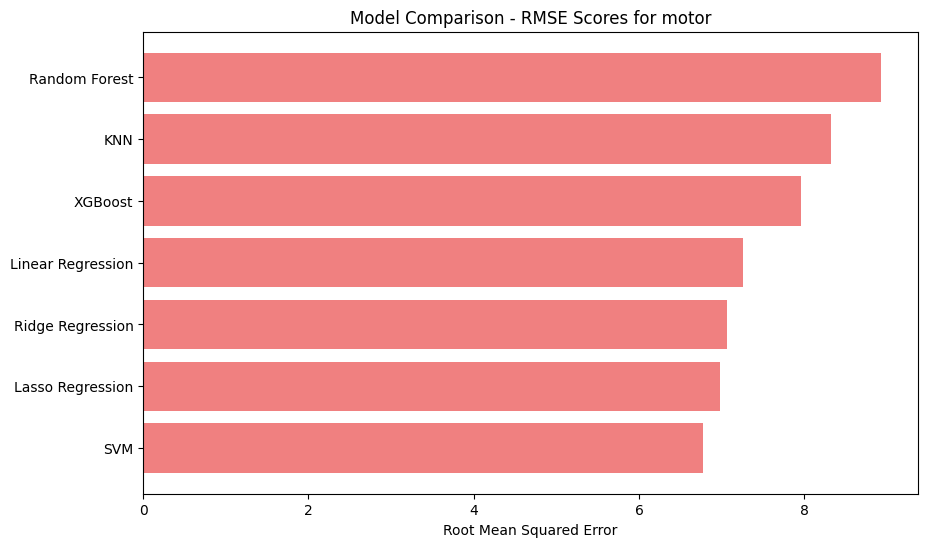

Model Comparison MSE Scores:
SVM: 45.85662905926483
Lasso Regression: 48.735582382947925
Ridge Regression: 49.960924017181725
Linear Regression: 52.74796823504689
XGBoost: 63.37122601581142
KNN: 69.2751584981433
Random Forest: 79.75292530498231


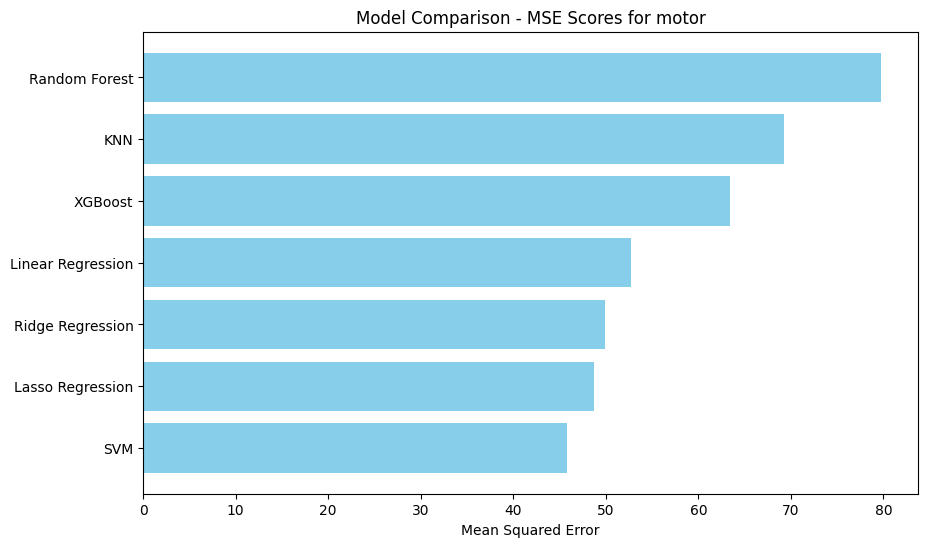

Model Comparison R2 Scores:
SVM: -0.4269266549816859
Lasso Regression: -0.5165114177583459
Ridge Regression: -0.5546405318082972
Linear Regression: -0.6413653470568115
XGBoost: -0.9719306328418527
KNN: -1.1556440631806546
Random Forest: -1.4816820875203494


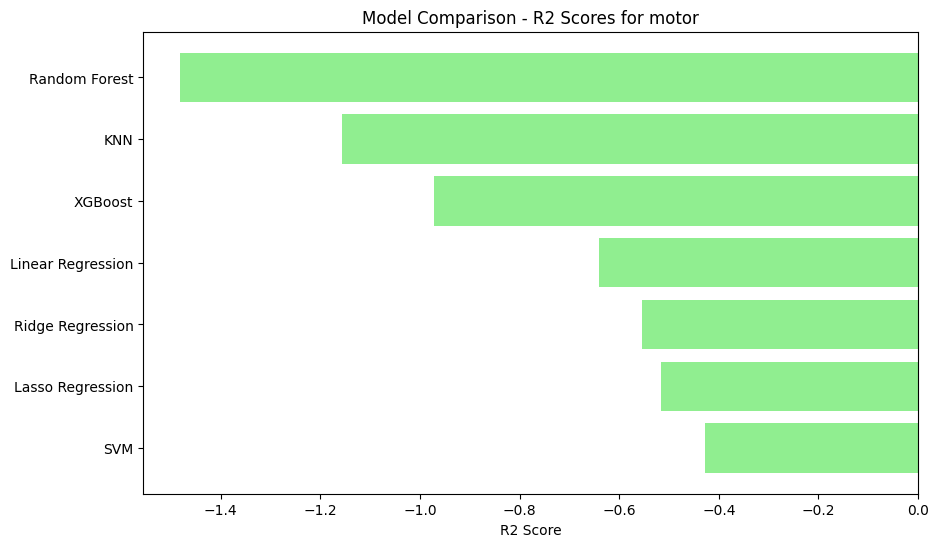

In [41]:
# Model comparison
models = {
    'Linear Regression': model_motor,
    'Ridge Regression': ridge_motor,
    'Lasso Regression': lasso_motor,
    'SVM': svm_motor,
    'Random Forest': rf_motor,
    'XGBoost': xgb_motor,
    'KNN': knn_motor
}
# rmse scores
rmse_scores = {}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test_motor, y_pred))
    rmse_scores[model_name] = rmse
rmse_scores = dict(sorted(rmse_scores.items(), key=lambda item: item[1]))
print("Model Comparison RMSE Scores:")
for model_name, rmse in rmse_scores.items():
    print(f"{model_name}: {rmse}")
# Plotting the RMSE scores
plt.figure(figsize=(10, 6))
plt.barh(list(rmse_scores.keys()), list(rmse_scores.values()), color='lightcoral')
plt.xlabel('Root Mean Squared Error')
plt.title('Model Comparison - RMSE Scores for motor')
plt.show()

mse_scores = {}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test_motor, y_pred)
    mse_scores[model_name] = mse
mse_scores = dict(sorted(mse_scores.items(), key=lambda item: item[1]))
print("Model Comparison MSE Scores:")
for model_name, mse in mse_scores.items():
    print(f"{model_name}: {mse}")
# Plotting the MSE scores
plt.figure(figsize=(10, 6))
plt.barh(list(mse_scores.keys()), list(mse_scores.values()), color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison - MSE Scores for motor')
plt.show()

# plotting r2 scores
r2_scores = {}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test_motor, y_pred)
    r2_scores[model_name] = r2
r2_scores = dict(sorted(r2_scores.items(), key=lambda item: item[1], reverse=True))
print("Model Comparison R2 Scores:")
for model_name, r2 in r2_scores.items():
    print(f"{model_name}: {r2}")

plt.figure(figsize=(10, 6))
plt.barh(list(r2_scores.keys()), list(r2_scores.values()), color='lightgreen')
plt.xlabel('R2 Score')
plt.title('Model Comparison - R2 Scores for motor')
plt.show()
